In [159]:
from math import ceil, floor, log10, sqrt, exp, pi, sin
from random import random, uniform, randrange
import numpy as np
import matplotlib.pyplot as plt
from bitarray import bitarray

 Get the limits of the point in each coordinate

In [160]:
limits = [
    [0, 0.001]
]

restrictions = [
    lambda point: True,
]


def toAllRestrictions(data, restrictions):
    for restriction in restrictions:
        if restriction(data) == False: return False
    
    return True


### Note: 

A gen is a sequence of 1 and 0,for example `[010101]`

and it is split in each coordinate `[[01], [0101]]`

So what we are going to do is calculate each gen size

In [161]:
precisitionBits = 4

def getNumberOfBits(rangeOfValues, precisitionBits):
    return ceil(log10(rangeOfValues * 10 ** precisitionBits) / log10(2))

def getRange(limit): return limit[1] - limit[0]

sizeOfEachGen = [getNumberOfBits(getRange(limit), precisitionBits) for limit in limits]
genTotalSize = sum(sizeOfEachGen)

print(sizeOfEachGen)
print(genTotalSize)

[4]
4


Create an initial poblation

In [162]:
def getRandomBob():
    return bitarray([(random() > 0.5) for i in range(genTotalSize)])

specialPoblation = [
    bitarray([True for i in range(genTotalSize)]),
    bitarray([False for i in range(genTotalSize)]),
    bitarray([i % 2 == False for i in range(genTotalSize)]),
]

randomPoblation = [getRandomBob() for i in range(10)]


Now create the points that represent the poblation

In [163]:
def calculateValue(gen, limit):
    rangeOfValues = getRange(limit)
    jump = (rangeOfValues) / (2 ** gen.length() - 1)  
    return jump * int(gen.to01(), 2) + limit[0]

def getCoordinateValue(gen, sizeOfEachGen, limits):
    results = []
    actualPosition = 0
    for i, size in enumerate(sizeOfEachGen):
        currentGen = gen[actualPosition: actualPosition + size]
        results.append(calculateValue(currentGen, limits[i]))
        actualPosition += size
    
    return results


def getValidPoblation(poblation, restrictions):
    for bob in poblation:
        
        value = getCoordinateValue(bob, sizeOfEachGen, limits)
        while (toAllRestrictions(value, restrictions) == False):
            bob = getRandomBob()
            value = getCoordinateValue(bob, sizeOfEachGen, limits)
    return poblation

Define the z function

In [164]:
def z(point):
    return (0.5 + 0.01*sin(2*pi*1000*point)) * sin(2*pi*1000000* point)

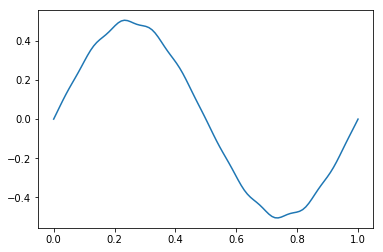

In [165]:
sample = np.linspace(0, 1, 100)
y = [z(point) for point in sample]

plt.plot(sample, y)
plt.show()

In [166]:
def getZfromGen(bob):
    point = getCoordinateValue(bob, sizeOfEachGen, limits)
    return z(point[0])

Next poblation

In [167]:

#Simulate

#Valid Poblation

poblation = randomPoblation
print ("\nPoblation")
print(poblation)

for i in range(20):
    poblation = getValidPoblation(poblation, restrictions)

    poblationAsPoints = ([getCoordinateValue(bob, sizeOfEachGen, limits) for bob in poblation])
    print ("\npoblationAsPoints:")
    print (poblationAsPoints)

    # Get the acumulate of the points
    poblationValues = [z(point[0]) for point in poblationAsPoints]
    print ("poblationValues:")
    print(poblationValues)
    
    print ("Max:")
    print(max(poblationValues))

    sumOfZ = sum(poblationValues)
    poblationValuesPercentage = [value / sumOfZ * 100 for value in poblationValues]

    poblationAcumulates = [None] * len(poblation)
    poblationAcumulates[0] = poblationValuesPercentage[0]

    for i in range(1, len(poblation)):
        poblationAcumulates[i] = poblationAcumulates[i-1] + poblationValuesPercentage[i]

    print ("\npoblationAcumulates:")
    print (poblationAcumulates)


    # Create n random numbers
    randomNumbers = [uniform(0, 100) for i in range(len(poblation))]
    print ("\nrandomNumbers:")
    print (randomNumbers)

    toBeSaved = dict()

    for number in randomNumbers:
        i = 0
        while (poblationAcumulates[i] < number): i += 1
            
        if (toBeSaved.get(i)): toBeSaved[i] += 1
        else: toBeSaved[i] = 1

    newPoblation = []
    genPriceSort = dict()
    for savedIndex in toBeSaved:
        genPriceSort[poblation[savedIndex].to01()] = toBeSaved[savedIndex]
        newPoblation.append(poblation[savedIndex])

    print ("\nnewPoblation:")
    print (newPoblation)
    
    
    notSaved = len(poblation) - len(newPoblation)
    print ("\n notSaved:")
    print (notSaved)
    
    toBeInPoblation = []
    
    
    alreadyLived = set()
    for bob in newPoblation:
        alreadyLived.add(bob.to01())
    
    while (notSaved > 0):

        if (random() < 0.5 or len(newPoblation) < 2):
            #Mutation
            newPoblation.sort(key= lambda x : genPriceSort[x.to01()])
            genAsString = list(newPoblation[-1].to01())
            index = randrange(len(genAsString))
            genAsString[index] = '0' if genAsString[index] == '1' else '1'

            genAsString = ('').join(genAsString)
            if (genAsString not in alreadyLived):
                toBeInPoblation.append(bitarray(genAsString))
                print ("Mutation")
                print (toBeInPoblation)

            else:
                print ("Not valid")
                notSaved += 1
        else:
            #Sex
            newPoblation.sort(key= lambda x : genPriceSort[x.to01()])
            genAsString1 = newPoblation[-1].to01()
            genAsString2 = newPoblation[-2].to01()
            index = randrange(len(genAsString1))

            newGen = genAsString1[0:index] + genAsString1[index:]
            
            if (newGen not in alreadyLived):
                toBeInPoblation.append(bitarray(newGen))
                print ("Sex")
                print (toBeInPoblation)

            else:
                print ("Not valid")
                notSaved += 1
                
        notSaved -= 1


    poblation = newPoblation + toBeInPoblation



Poblation
[bitarray('0110'), bitarray('0101'), bitarray('0101'), bitarray('0110'), bitarray('0111'), bitarray('1111'), bitarray('1011'), bitarray('1011'), bitarray('0101'), bitarray('1111')]

poblationAsPoints:
[[0.0004], [0.0003333333333333334], [0.0003333333333333334], [0.0004], [0.00046666666666666666], [0.001], [0.0007333333333333333], [0.0007333333333333333], [0.0003333333333333334], [0.001]]
poblationValues:
[7.949917898594426e-15, 0.4405127018922353, 0.4405127018922353, 7.949917898594426e-15, -0.4348132699520484, -3.2141664592756335e-13, 0.4243998896321431, 0.4243998896321431, 0.4405127018922353, -3.2141664592756335e-13]
Max:
0.4405127018922353

poblationAcumulates:
[4.580700169814615e-13, 25.38210625697226, 50.76421251394406, 50.764212513944514, 25.71050447679429, 25.71050447677577, 50.16419910991125, 74.61789374304672, 100.00000000001853, 100.00000000000001]

randomNumbers:
[88.79464600572585, 21.89456578614427, 66.25625881379081, 86.81168517121118, 60.26686378367702, 8.12340